In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

# 1. DATA 불러오기

In [2]:
doosan_df1 = pd.read_csv('두산 타자 종합 data.csv', encoding="cp949")
kt_df1 = pd.read_csv('KT 타자 종합 data.csv', encoding="cp949")

doosan_df2 = pd.read_csv('두산 타자 아웃카운트별 data.csv', encoding="cp949")
kt_df2 = pd.read_csv('KT 타자 아웃카운트별 data.csv', encoding="cp949")

doosan_df3 = pd.read_csv('두산 타자 주자 위치별 data.csv', encoding="cp949")
kt_df3 = pd.read_csv('KT 타자 주자 위치별 data.csv', encoding="cp949")

doosan_df4 = pd.read_csv('두산 타자 카운트별 data.csv', encoding="cp949")
kt_df4 = pd.read_csv('KT 타자 카운트별 data.csv', encoding="cp949")

doosan_df5 = pd.read_csv('두산 투수 상대전적 data.csv', encoding="cp949")
kt_df5 = pd.read_csv('KT 투수 상대전적 data.csv', encoding="cp949")

In [3]:
doosan_df1

,타자 정보,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS
0,정수빈,0.271,42,5,0,2,14,28,2,2,23,15,0.342,0.375,0.717
1,케이브,0.319,45,7,1,3,22,22,0,3,10,31,0.447,0.361,0.808
2,양의지,0.329,47,9,0,5,29,20,0,2,21,21,0.497,0.417,0.914
3,김재환,0.255,35,4,1,5,24,19,0,0,17,34,0.409,0.346,0.755
4,양석환,0.277,44,10,0,5,22,21,0,3,13,45,0.434,0.341,0.775
5,강승호,0.224,35,10,2,3,16,23,0,1,14,52,0.372,0.303,0.675
6,오명진,0.253,23,5,2,1,16,13,0,0,9,20,0.385,0.327,0.712
7,김인태,0.283,17,4,0,1,8,6,0,0,13,14,0.400,0.411,0.811
8,박준영,0.227,25,8,0,1,10,9,1,1,10,32,0.327,0.306,0.633
9,김기연,0.305,18,3,0,1,11,7,2,1,6,14,0.407,0.364,0.771


In [4]:
kt_df1

,타자 정보,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS
0,로하스,0.237,37,8,0,6,18,25,0,2,32,40,0.404,0.366,0.770
1,강백호,0.227,29,6,0,6,16,12,0,0,12,26,0.414,0.298,0.712
2,허경민,0.301,31,2,0,1,8,9,0,1,11,12,0.350,0.371,0.721
3,안현민,0.370,20,4,1,6,17,10,0,0,4,10,0.815,0.433,1.248
4,장성우,0.208,27,4,0,4,19,12,1,4,21,34,0.331,0.310,0.641
5,김민혁,0.329,54,6,1,0,11,21,0,1,6,14,0.378,0.358,0.736
6,황재균,0.256,34,5,0,1,13,13,0,1,14,30,0.316,0.329,0.645
7,배정대,0.184,21,5,2,1,12,6,4,2,5,33,0.289,0.234,0.523
8,김상수,0.206,12,3,0,1,3,7,0,0,14,6,0.302,0.351,0.653
9,문상철,0.227,22,3,1,1,5,7,0,1,10,24,0.309,0.303,0.602


In [5]:
doosan_df2

,아웃카운트에 따른 타율,0 OUT,1 OUT,2 OUT
0,정수빈,0.297,0.222,0.267
1,케이브,0.302,0.388,0.256
2,양의지,0.341,0.255,0.392
3,김재환,0.250,0.156,0.354
4,양석환,0.311,0.273,0.254
5,강승호,0.232,0.283,0.149
6,오명진,0.226,0.400,0.133
7,김인태,0.222,0.238,0.381
8,박준영,0.360,0.233,0.143
9,김기연,0.238,0.286,0.412


In [6]:
kt_df2

,아웃카운트에 따른 타율,0 OUT,1 OUT,2 OUT
0,로하스,0.221,0.255,0.243
1,강백호,0.268,0.195,0.217
2,허경민,0.259,0.268,0.371
3,안현민,0.350,0.313,0.444
4,장성우,0.143,0.250,0.245
5,김민혁,0.288,0.345,0.360
6,황재균,0.227,0.304,0.212
7,배정대,0.118,0.171,0.256
8,김상수,0.217,0.333,0.120
9,문상철,0.200,0.294,0.184


## NaN 값을 타자의 1루~만루 타율 값의 평균으로 넣어주기

In [7]:
doosan_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,정수빈,0.393,0.364,0.167,0.167,0.000,0.500,0.000
1,케이브,0.290,0.429,0.000,0.286,0.500,1.000,0.000
2,양의지,0.393,0.389,0.500,0.385,0.500,0.500,0.000
3,김재환,0.324,0.500,0.000,0.385,0.500,0.000,0.000
4,양석환,0.206,0.313,0.000,0.000,0.400,0.600,0.250
5,강승호,0.235,0.000,0.429,0.286,0.250,0.000,0.200
6,오명진,0.200,0.400,0.333,0.000,0.333,0.000,0.667
7,김인태,0.250,0.500,0.500,0.200,0.000,0.333,0.500
8,박준영,0.174,0.200,0.000,0.333,0.000,0.333,0.000
9,김기연,0.583,0.000,0.000,0.400,NaN,0.333,1.000


In [8]:
cols_to_fill = ["1루", "2루", "3루", "1루,2루", "1루,3루", "2루,3루", "만루"]
doosan_df3[cols_to_fill] = doosan_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
doosan_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,정수빈,0.393,0.364,0.1670,0.167,0.000,0.500,0.0000
1,케이브,0.290,0.429,0.0000,0.286,0.500,1.000,0.0000
2,양의지,0.393,0.389,0.5000,0.385,0.500,0.500,0.0000
3,김재환,0.324,0.500,0.0000,0.385,0.500,0.000,0.0000
4,양석환,0.206,0.313,0.0000,0.000,0.400,0.600,0.2500
5,강승호,0.235,0.000,0.4290,0.286,0.250,0.000,0.2000
6,오명진,0.200,0.400,0.3330,0.000,0.333,0.000,0.6670
7,김인태,0.250,0.500,0.5000,0.200,0.000,0.333,0.5000
8,박준영,0.174,0.200,0.0000,0.333,0.000,0.333,0.0000
9,김기연,0.583,0.000,0.0000,0.400,0.386,0.333,1.0000


In [9]:
kt_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,로하스,0.200,0.333,0.200,0.143,0.00,0.000,1.000
1,강백호,0.237,0.300,0.400,0.100,0.25,0.000,0.000
2,허경민,0.333,0.000,0.400,0.125,0.50,0.250,NaN
3,안현민,0.455,0.333,0.667,0.500,0.00,0.000,0.500
4,장성우,0.250,0.333,0.000,0.100,0.25,0.000,0.400
5,김민혁,0.267,0.143,0.333,0.364,0.40,0.000,0.333
6,황재균,0.323,0.000,0.667,0.455,1.00,0.000,0.500
7,배정대,0.217,0.125,0.667,0.231,NaN,0.333,0.000
8,김상수,0.200,0.000,0.500,0.000,1.00,NaN,0.000
9,문상철,0.143,0.000,0.500,0.222,0.00,0.000,0.000


In [10]:
cols_to_fill = ["1루", "2루", "3루", "1루,2루", "1루,3루", "2루,3루", "만루"]
kt_df3[cols_to_fill] = kt_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
kt_df3

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,로하스,0.200,0.333,0.200,0.143,0.000000,0.000000,1.000
1,강백호,0.237,0.300,0.400,0.100,0.250000,0.000000,0.000
2,허경민,0.333,0.000,0.400,0.125,0.500000,0.250000,0.268
3,안현민,0.455,0.333,0.667,0.500,0.000000,0.000000,0.500
4,장성우,0.250,0.333,0.000,0.100,0.250000,0.000000,0.400
5,김민혁,0.267,0.143,0.333,0.364,0.400000,0.000000,0.333
6,황재균,0.323,0.000,0.667,0.455,1.000000,0.000000,0.500
7,배정대,0.217,0.125,0.667,0.231,0.262167,0.333000,0.000
8,김상수,0.200,0.000,0.500,0.000,1.000000,0.283333,0.000
9,문상철,0.143,0.000,0.500,0.222,0.000000,0.000000,0.000


## NaN 값을 각 행의 평균 값으로 넣어주기 (예를 들어 임종성 선수의 1S 1B 카운트의 NaN 값을 그 카운트의 전체 평균값으로 넣어주기)

In [11]:
doosan_df4

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,정수빈,0.417,0.167,0.214,0.300,0.333,0.857,0.200,0.188,0.214,0.500,0.000,NaN
1,케이브,0.533,0.400,0.083,0.385,0.167,1.000,0.250,0.333,0.167,0.313,0.429,NaN
2,양의지,0.381,0.583,0.364,0.333,0.333,0.500,0.222,0.240,0.308,0.214,0.667,NaN
3,김재환,0.450,0.385,0.231,0.333,0.167,0.250,0.083,0.042,0.375,0.571,0.333,NaN
4,양석환,0.400,0.385,0.250,0.429,0.286,0.333,0.156,0.281,0.278,0.143,0.000,NaN
5,강승호,0.200,0.385,0.143,0.429,0.500,0.500,0.077,0.103,0.111,0.583,0.000,NaN
6,오명진,0.571,0.167,0.167,0.200,0.000,NaN,0.077,0.222,0.400,0.273,0.000,NaN
7,김인태,0.429,0.600,0.000,0.000,0.000,1.000,0.250,0.375,0.667,0.000,1.000,NaN
8,박준영,0.250,0.167,0.250,0.429,0.167,0.000,0.080,0.316,0.375,0.000,0.500,NaN
9,김기연,0.571,0.200,0.143,0.400,0.400,1.000,0.000,0.333,0.667,0.200,0.500,NaN


## 여기서 1S는 제거했는데, 주피터 노트북의 오류인지는 잘 모르겠지만 1S column을 인식하지 못하는 상황이라 빼고 입력했습니다. 아마 다른 data들도 1s에서 오류가 발생하면 빼고 진행하시면 됩니다!

In [12]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

doosan_df4[count_cols] = doosan_df4[count_cols].fillna(doosan_df4[count_cols].mean())
doosan_df4

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,정수빈,0.417,0.167,0.214,0.3000,0.333,0.857000,0.200,0.188,0.214,0.500,0.0000,NaN
1,케이브,0.533,0.400,0.083,0.3850,0.167,1.000000,0.250,0.333,0.167,0.313,0.4290,NaN
2,양의지,0.381,0.583,0.364,0.3330,0.333,0.500000,0.222,0.240,0.308,0.214,0.6670,NaN
3,김재환,0.450,0.385,0.231,0.3330,0.167,0.250000,0.083,0.042,0.375,0.571,0.3330,NaN
4,양석환,0.400,0.385,0.250,0.4290,0.286,0.333000,0.156,0.281,0.278,0.143,0.0000,NaN
5,강승호,0.200,0.385,0.143,0.4290,0.500,0.500000,0.077,0.103,0.111,0.583,0.0000,NaN
6,오명진,0.571,0.167,0.167,0.2000,0.000,0.604444,0.077,0.222,0.400,0.273,0.0000,NaN
7,김인태,0.429,0.600,0.000,0.0000,0.000,1.000000,0.250,0.375,0.667,0.000,1.0000,NaN
8,박준영,0.250,0.167,0.250,0.4290,0.167,0.000000,0.080,0.316,0.375,0.000,0.5000,NaN
9,김기연,0.571,0.200,0.143,0.4000,0.400,1.000000,0.000,0.333,0.667,0.200,0.5000,NaN


In [13]:
kt_df4

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,로하스,0.400,0.211,0.000,0.714,0.600,0.000,0.172,0.231,0.250,0.250,0.400,0.0
1,강백호,0.273,0.222,0.158,0.267,0.286,0.500,0.056,0.167,0.188,0.364,0.600,NaN
2,허경민,0.200,0.333,0.158,0.300,0.500,0.200,0.375,0.400,0.333,NaN,NaN,NaN
3,안현민,0.500,0.286,0.333,0.300,1.000,0.400,0.400,0.000,0.333,0.667,0.667,NaN
4,장성우,0.300,0.429,0.125,0.286,0.333,0.250,0.120,0.267,0.118,0.133,0.000,NaN
5,김민혁,0.227,0.467,0.143,0.300,0.438,0.286,0.360,0.400,0.182,0.500,0.200,NaN
6,황재균,0.308,0.300,0.154,0.500,0.417,0.000,0.214,0.182,0.286,0.500,0.000,NaN
7,배정대,0.300,0.558,0.000,0.333,0.429,0.000,0.059,0.053,0.200,0.167,1.000,NaN
8,김상수,0.000,0.167,0.000,0.077,0.500,0.000,0.200,0.250,0.571,0.600,0.000,NaN
9,문상철,0.409,0.250,0.357,0.333,0.125,0.333,0.077,0.167,0.091,0.100,0.000,NaN


In [14]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

kt_df4[count_cols] = kt_df4[count_cols].fillna(kt_df4[count_cols].mean())
kt_df4

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,로하스,0.400,0.211,0.000,0.714,0.600,0.000,0.172,0.231,0.250,0.2500,0.400000,0.0
1,강백호,0.273,0.222,0.158,0.267,0.286,0.500,0.056,0.167,0.188,0.3640,0.600000,0.0
2,허경민,0.200,0.333,0.158,0.300,0.500,0.200,0.375,0.400,0.333,0.3448,0.318556,0.0
3,안현민,0.500,0.286,0.333,0.300,1.000,0.400,0.400,0.000,0.333,0.6670,0.667000,0.0
4,장성우,0.300,0.429,0.125,0.286,0.333,0.250,0.120,0.267,0.118,0.1330,0.000000,0.0
5,김민혁,0.227,0.467,0.143,0.300,0.438,0.286,0.360,0.400,0.182,0.5000,0.200000,0.0
6,황재균,0.308,0.300,0.154,0.500,0.417,0.000,0.214,0.182,0.286,0.5000,0.000000,0.0
7,배정대,0.300,0.558,0.000,0.333,0.429,0.000,0.059,0.053,0.200,0.1670,1.000000,0.0
8,김상수,0.000,0.167,0.000,0.077,0.500,0.000,0.200,0.250,0.571,0.6000,0.000000,0.0
9,문상철,0.409,0.250,0.357,0.333,0.125,0.333,0.077,0.167,0.091,0.1000,0.000000,0.0


## 상대전적에서의 NaN 값은 (해당투수별 전적 타율의 평균값 + KT전 타율) /2로 채워주기. 예를 들어 김인태 선수의 NaN값 --> (두산 전체의 고영표 선수 상대 평균 타율 + 김인태선수의 KT전 타율) /2

In [15]:
doosan_df5

,상대전적,고영표,쿠에바스,오원석,KT
0,정수빈,0.500,0.333,1.0,0.375
1,케이브,1.000,0.000,0.0,0.333
2,양의지,0.000,0.000,0.0,0.250
3,김재환,0.333,0.000,0.0,0.364
4,양석환,1.000,0.000,0.0,0.167
5,강승호,0.667,0.000,0.0,0.208
6,오명진,0.000,0.000,NaN,0.000
7,김인태,NaN,0.000,NaN,0.286
8,박준영,NaN,0.000,0.0,0.250
9,김기연,NaN,NaN,NaN,0.429


In [16]:
count_cols = ["KT"]
doosan_df5[count_cols] = doosan_df5[count_cols].fillna(doosan_df5[count_cols].mean())
doosan_df5

,상대전적,고영표,쿠에바스,오원석,KT
0,정수빈,0.500,0.333,1.0,0.3750
1,케이브,1.000,0.000,0.0,0.3330
2,양의지,0.000,0.000,0.0,0.2500
3,김재환,0.333,0.000,0.0,0.3640
4,양석환,1.000,0.000,0.0,0.1670
5,강승호,0.667,0.000,0.0,0.2080
6,오명진,0.000,0.000,NaN,0.0000
7,김인태,NaN,0.000,NaN,0.2860
8,박준영,NaN,0.000,0.0,0.2500
9,김기연,NaN,NaN,NaN,0.4290


In [17]:
타자컬럼 = ['고영표', '쿠에바스', '오원석']
for col in 타자컬럼:
    col_mean = doosan_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean + row['KT']) / 2
        else:
            return row[col]
    doosan_df5[col] = doosan_df5.apply(fill_func, axis=1)

doosan_df5

,상대전적,고영표,쿠에바스,오원석,KT
0,정수빈,0.5000,0.33300,1.000000,0.3750
1,케이브,1.0000,0.00000,0.000000,0.3330
2,양의지,0.0000,0.00000,0.000000,0.2500
3,김재환,0.3330,0.00000,0.000000,0.3640
4,양석환,1.0000,0.00000,0.000000,0.1670
5,강승호,0.6670,0.00000,0.000000,0.2080
6,오명진,0.0000,0.00000,0.071429,0.0000
7,김인태,0.3930,0.00000,0.214429,0.2860
8,박준영,0.3750,0.00000,0.000000,0.2500
9,김기연,0.4645,0.23115,0.285929,0.4290


In [18]:
kt_df5

,상대 전적,최승용,홍민규,콜어빈,두산
0,로하스,0.000,NaN,0.666,0.353
1,강백호,0.333,NaN,NaN,0.182
2,허경민,0.333,NaN,NaN,0.385
3,안현민,NaN,0.0,0.333,0.200
4,장성우,0.333,NaN,0.000,0.095
5,김민혁,0.333,NaN,0.333,0.471
6,황재균,0.000,NaN,0.333,0.263
7,배정대,0.000,0.0,0.000,0.217
8,김상수,1.000,NaN,NaN,0.400
9,문상철,0.000,0.0,0.000,0.077


In [19]:
타자컬럼 = ['최승용', '홍민규', '콜어빈']

for col in 타자컬럼:
    col_mean = kt_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean + row['두산']) / 2
        else:
            return row[col]
    kt_df5[col] = kt_df5.apply(fill_func, axis=1)

kt_df5

,상대 전적,최승용,홍민규,콜어빈,두산
0,로하스,0.000000,0.1765,0.666000,0.353
1,강백호,0.333000,0.0910,0.195062,0.182
2,허경민,0.333000,0.1925,0.296563,0.385
3,안현민,0.229556,0.0000,0.333000,0.200
4,장성우,0.333000,0.0475,0.000000,0.095
5,김민혁,0.333000,0.2355,0.333000,0.471
6,황재균,0.000000,0.1315,0.333000,0.263
7,배정대,0.000000,0.0000,0.000000,0.217
8,김상수,1.000000,0.2000,0.304063,0.400
9,문상철,0.000000,0.0000,0.000000,0.077


# Step2. 타순짜기

## 5월 29일 경기는 1번은 OPS, 상대전적 평균치 1등선수, 2번,3번은 장타율, 타율, 상대전적 가중치 합산 등수 기준, 4번 -6번은 타율, 득점권 타율 기준, 7번~9번은 출루율, 상대전적의 가중치 합산 기준

In [22]:
doosan_df1 = doosan_df1.rename(columns={'타자 정보': '타자명'})
doosan_df3 = doosan_df3.rename(columns={'주자 위치에 따른 타율': '타자명'})
doosan_df5 = doosan_df5.rename(columns={'상대전적': '타자명'})

In [27]:
df = pd.merge(doosan_df1, doosan_df5[['타자명', '오원석']], on='타자명', how='left')

In [28]:
df = pd.merge(df,doosan_df3, on='타자명', how='left')

## 1번 : OPS와 상대전적 가중치 0.4, 0.6으로 했을때 1등

In [29]:
df['점수'] = (df['OPS'] * 0.4) +  (df['오원석'] * 0.6)
df_두산타순 = df.sort_values(by='점수', ascending=False)
df_두산타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,오원석,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
0,정수빈,0.271,42,5,0,2,14,28,2,2,...,0.717,1.000000,0.393,0.364,0.1670,0.167,0.000,0.500,0.0000,0.886800
9,김기연,0.305,18,3,0,1,11,7,2,1,...,0.771,0.285929,0.583,0.000,0.0000,0.400,0.386,0.333,1.0000,0.479957
7,김인태,0.283,17,4,0,1,8,6,0,0,...,0.811,0.214429,0.250,0.500,0.5000,0.200,0.000,0.333,0.5000,0.453057
2,양의지,0.329,47,9,0,5,29,20,0,2,...,0.914,0.000000,0.393,0.389,0.5000,0.385,0.500,0.500,0.0000,0.365600
6,오명진,0.253,23,5,2,1,16,13,0,0,...,0.712,0.071429,0.200,0.400,0.3330,0.000,0.333,0.000,0.6670,0.327657
1,케이브,0.319,45,7,1,3,22,22,0,3,...,0.808,0.000000,0.290,0.429,0.0000,0.286,0.500,1.000,0.0000,0.323200
10,임종성,0.227,5,1,0,0,2,1,0,0,...,0.500,0.204529,0.500,0.333,0.2666,0.500,0.000,0.000,0.2666,0.322717
4,양석환,0.277,44,10,0,5,22,21,0,3,...,0.775,0.000000,0.206,0.313,0.0000,0.000,0.400,0.600,0.2500,0.310000
3,김재환,0.255,35,4,1,5,24,19,0,0,...,0.755,0.000000,0.324,0.500,0.0000,0.385,0.500,0.000,0.0000,0.302000
5,강승호,0.224,35,10,2,3,16,23,0,1,...,0.675,0.000000,0.235,0.000,0.4290,0.286,0.250,0.000,0.2000,0.270000


## 2번, 3번 : 장타율, 타율, 상대전적을 0.4 0.3, 0.3 가중치로 두었을때의 순위로 매기기

In [30]:
df['점수'] = (df['장타율'] * 0.4) + (df['타율'] * 0.3) + (df['오원석'] * 0.3)
df_두산타순 = df.sort_values(by='점수', ascending=False)
df_두산타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,오원석,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
0,정수빈,0.271,42,5,0,2,14,28,2,2,...,0.717,1.000000,0.393,0.364,0.1670,0.167,0.000,0.500,0.0000,0.518100
9,김기연,0.305,18,3,0,1,11,7,2,1,...,0.771,0.285929,0.583,0.000,0.0000,0.400,0.386,0.333,1.0000,0.340079
7,김인태,0.283,17,4,0,1,8,6,0,0,...,0.811,0.214429,0.250,0.500,0.5000,0.200,0.000,0.333,0.5000,0.309229
2,양의지,0.329,47,9,0,5,29,20,0,2,...,0.914,0.000000,0.393,0.389,0.5000,0.385,0.500,0.500,0.0000,0.297500
1,케이브,0.319,45,7,1,3,22,22,0,3,...,0.808,0.000000,0.290,0.429,0.0000,0.286,0.500,1.000,0.0000,0.274500
4,양석환,0.277,44,10,0,5,22,21,0,3,...,0.775,0.000000,0.206,0.313,0.0000,0.000,0.400,0.600,0.2500,0.256700
6,오명진,0.253,23,5,2,1,16,13,0,0,...,0.712,0.071429,0.200,0.400,0.3330,0.000,0.333,0.000,0.6670,0.251329
3,김재환,0.255,35,4,1,5,24,19,0,0,...,0.755,0.000000,0.324,0.500,0.0000,0.385,0.500,0.000,0.0000,0.240100
10,임종성,0.227,5,1,0,0,2,1,0,0,...,0.500,0.204529,0.500,0.333,0.2666,0.500,0.000,0.000,0.2666,0.238659
5,강승호,0.224,35,10,2,3,16,23,0,1,...,0.675,0.000000,0.235,0.000,0.4290,0.286,0.250,0.000,0.2000,0.216000


## 4번 ~ 6번 : 타율, 득점권 타율을 동일한 가중치로 합산해서 매기기

In [32]:
df['점수'] = (df['타율'] * 0.2) + (df['2루,3루'] * 0.2) + (df['만루'] * 0.2) + (df['1루,3루'] * 0.2) + (df['1루,2루'] * 0.2)
df_두산타순 = df.sort_values(by='점수', ascending=False)
df_두산타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,오원석,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
9,김기연,0.305,18,3,0,1,11,7,2,1,...,0.771,0.285929,0.583,0.000,0.0000,0.400,0.386,0.333,1.0000,0.48480
1,케이브,0.319,45,7,1,3,22,22,0,3,...,0.808,0.000000,0.290,0.429,0.0000,0.286,0.500,1.000,0.0000,0.42100
2,양의지,0.329,47,9,0,5,29,20,0,2,...,0.914,0.000000,0.393,0.389,0.5000,0.385,0.500,0.500,0.0000,0.34280
4,양석환,0.277,44,10,0,5,22,21,0,3,...,0.775,0.000000,0.206,0.313,0.0000,0.000,0.400,0.600,0.2500,0.30540
7,김인태,0.283,17,4,0,1,8,6,0,0,...,0.811,0.214429,0.250,0.500,0.5000,0.200,0.000,0.333,0.5000,0.26320
6,오명진,0.253,23,5,2,1,16,13,0,0,...,0.712,0.071429,0.200,0.400,0.3330,0.000,0.333,0.000,0.6670,0.25060
3,김재환,0.255,35,4,1,5,24,19,0,0,...,0.755,0.000000,0.324,0.500,0.0000,0.385,0.500,0.000,0.0000,0.22800
10,임종성,0.227,5,1,0,0,2,1,0,0,...,0.500,0.204529,0.500,0.333,0.2666,0.500,0.000,0.000,0.2666,0.19872
5,강승호,0.224,35,10,2,3,16,23,0,1,...,0.675,0.000000,0.235,0.000,0.4290,0.286,0.250,0.000,0.2000,0.19200
0,정수빈,0.271,42,5,0,2,14,28,2,2,...,0.717,1.000000,0.393,0.364,0.1670,0.167,0.000,0.500,0.0000,0.18760


## 7번 ~ 9번 : 출루율, 상대전적을 동일한 가중치로 두었을때의 순위로 매기기

In [33]:
df['점수'] = (df['출루율'] * 0.5) + (df['오원석'] * 0.5)
df_두산타순 = df.sort_values(by='점수', ascending=False)
df_두산타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,오원석,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
0,정수빈,0.271,42,5,0,2,14,28,2,2,...,0.717,1.000000,0.393,0.364,0.1670,0.167,0.000,0.500,0.0000,0.687500
9,김기연,0.305,18,3,0,1,11,7,2,1,...,0.771,0.285929,0.583,0.000,0.0000,0.400,0.386,0.333,1.0000,0.324964
7,김인태,0.283,17,4,0,1,8,6,0,0,...,0.811,0.214429,0.250,0.500,0.5000,0.200,0.000,0.333,0.5000,0.312714
10,임종성,0.227,5,1,0,0,2,1,0,0,...,0.500,0.204529,0.500,0.333,0.2666,0.500,0.000,0.000,0.2666,0.215764
2,양의지,0.329,47,9,0,5,29,20,0,2,...,0.914,0.000000,0.393,0.389,0.5000,0.385,0.500,0.500,0.0000,0.208500
6,오명진,0.253,23,5,2,1,16,13,0,0,...,0.712,0.071429,0.200,0.400,0.3330,0.000,0.333,0.000,0.6670,0.199214
1,케이브,0.319,45,7,1,3,22,22,0,3,...,0.808,0.000000,0.290,0.429,0.0000,0.286,0.500,1.000,0.0000,0.180500
3,김재환,0.255,35,4,1,5,24,19,0,0,...,0.755,0.000000,0.324,0.500,0.0000,0.385,0.500,0.000,0.0000,0.173000
4,양석환,0.277,44,10,0,5,22,21,0,3,...,0.775,0.000000,0.206,0.313,0.0000,0.000,0.400,0.600,0.2500,0.170500
8,박준영,0.227,25,8,0,1,10,9,1,1,...,0.633,0.000000,0.174,0.200,0.0000,0.333,0.000,0.333,0.0000,0.153000


# 최종 두산 라인업 : 정수빈 김기연 김인태 케이브 양의지 양석환 임종성 오명진 김재환

## KT도 동일한 방식으로 진행

In [34]:
kt_df1 = kt_df1.rename(columns={'타자 정보': '타자명'})
kt_df3 = kt_df3.rename(columns={'주자 위치에 따른 타율': '타자명'})
kt_df5 = kt_df5.rename(columns={'상대 전적': '타자명'})

In [35]:
df = pd.merge(kt_df1, kt_df5[['타자명', '콜어빈']], on='타자명', how='left')

In [37]:
df = pd.merge(df, kt_df3, on='타자명', how='left')

In [39]:
df['점수'] = (df['OPS'] * 0.4) +  (df['콜어빈'] * 0.6)
df_kt타순 = df.sort_values(by='점수', ascending=False)
df_kt타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,콜어빈,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
0,로하스,0.237,37,8,0,6,18,25,0,2,...,0.770,0.666000,0.200,0.333,0.200,0.143,0.000000,0.000000,1.000,0.707600
3,안현민,0.370,20,4,1,6,17,10,0,0,...,1.248,0.333000,0.455,0.333,0.667,0.500,0.000000,0.000000,0.500,0.699000
5,김민혁,0.329,54,6,1,0,11,21,0,1,...,0.736,0.333000,0.267,0.143,0.333,0.364,0.400000,0.000000,0.333,0.494200
2,허경민,0.301,31,2,0,1,8,9,0,1,...,0.721,0.296563,0.333,0.000,0.400,0.125,0.500000,0.250000,0.268,0.466337
6,황재균,0.256,34,5,0,1,13,13,0,1,...,0.645,0.333000,0.323,0.000,0.667,0.455,1.000000,0.000000,0.500,0.457800
8,김상수,0.206,12,3,0,1,3,7,0,0,...,0.653,0.304063,0.200,0.000,0.500,0.000,1.000000,0.283333,0.000,0.443638
1,강백호,0.227,29,6,0,6,16,12,0,0,...,0.712,0.195062,0.237,0.300,0.400,0.100,0.250000,0.000000,0.000,0.401837
10,권동진,0.317,26,3,1,0,7,10,2,1,...,0.772,0.000000,0.333,0.000,0.500,0.500,0.250000,1.000000,0.000,0.308800
4,장성우,0.208,27,4,0,4,19,12,1,4,...,0.641,0.000000,0.250,0.333,0.000,0.100,0.250000,0.000000,0.400,0.256400
9,문상철,0.227,22,3,1,1,5,7,0,1,...,0.602,0.000000,0.143,0.000,0.500,0.222,0.000000,0.000000,0.000,0.240800


In [42]:
df['점수'] = (df['장타율'] * 0.4) + (df['타율'] * 0.3) + (df['콜어빈'] * 0.3)
df_kt타순 = df.sort_values(by='점수', ascending=False)
df_kt타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,콜어빈,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
3,안현민,0.370,20,4,1,6,17,10,0,0,...,1.248,0.333000,0.455,0.333,0.667,0.500,0.000000,0.000000,0.500,0.536900
0,로하스,0.237,37,8,0,6,18,25,0,2,...,0.770,0.666000,0.200,0.333,0.200,0.143,0.000000,0.000000,1.000,0.432500
5,김민혁,0.329,54,6,1,0,11,21,0,1,...,0.736,0.333000,0.267,0.143,0.333,0.364,0.400000,0.000000,0.333,0.349800
2,허경민,0.301,31,2,0,1,8,9,0,1,...,0.721,0.296563,0.333,0.000,0.400,0.125,0.500000,0.250000,0.268,0.319269
6,황재균,0.256,34,5,0,1,13,13,0,1,...,0.645,0.333000,0.323,0.000,0.667,0.455,1.000000,0.000000,0.500,0.303100
1,강백호,0.227,29,6,0,6,16,12,0,0,...,0.712,0.195062,0.237,0.300,0.400,0.100,0.250000,0.000000,0.000,0.292219
8,김상수,0.206,12,3,0,1,3,7,0,0,...,0.653,0.304063,0.200,0.000,0.500,0.000,1.000000,0.283333,0.000,0.273819
10,권동진,0.317,26,3,1,0,7,10,2,1,...,0.772,0.000000,0.333,0.000,0.500,0.500,0.250000,1.000000,0.000,0.246300
4,장성우,0.208,27,4,0,4,19,12,1,4,...,0.641,0.000000,0.250,0.333,0.000,0.100,0.250000,0.000000,0.400,0.194800
9,문상철,0.227,22,3,1,1,5,7,0,1,...,0.602,0.000000,0.143,0.000,0.500,0.222,0.000000,0.000000,0.000,0.191700


In [43]:
df['점수'] = (df['타율'] * 0.2) + (df['2루,3루'] * 0.2) + (df['만루'] * 0.2) + (df['1루,3루'] * 0.2) + (df['1루,2루'] * 0.2)
df_kt타순 = df.sort_values(by='점수', ascending=False)
df_kt타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,콜어빈,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
6,황재균,0.256,34,5,0,1,13,13,0,1,...,0.645,0.333000,0.323,0.000,0.667,0.455,1.000000,0.000000,0.500,0.442200
10,권동진,0.317,26,3,1,0,7,10,2,1,...,0.772,0.000000,0.333,0.000,0.500,0.500,0.250000,1.000000,0.000,0.413400
8,김상수,0.206,12,3,0,1,3,7,0,0,...,0.653,0.304063,0.200,0.000,0.500,0.000,1.000000,0.283333,0.000,0.297867
2,허경민,0.301,31,2,0,1,8,9,0,1,...,0.721,0.296563,0.333,0.000,0.400,0.125,0.500000,0.250000,0.268,0.288800
5,김민혁,0.329,54,6,1,0,11,21,0,1,...,0.736,0.333000,0.267,0.143,0.333,0.364,0.400000,0.000000,0.333,0.285200
0,로하스,0.237,37,8,0,6,18,25,0,2,...,0.770,0.666000,0.200,0.333,0.200,0.143,0.000000,0.000000,1.000,0.276000
3,안현민,0.370,20,4,1,6,17,10,0,0,...,1.248,0.333000,0.455,0.333,0.667,0.500,0.000000,0.000000,0.500,0.274000
7,배정대,0.184,21,5,2,1,12,6,4,2,...,0.523,0.000000,0.217,0.125,0.667,0.231,0.262167,0.333000,0.000,0.202033
4,장성우,0.208,27,4,0,4,19,12,1,4,...,0.641,0.000000,0.250,0.333,0.000,0.100,0.250000,0.000000,0.400,0.191600
1,강백호,0.227,29,6,0,6,16,12,0,0,...,0.712,0.195062,0.237,0.300,0.400,0.100,0.250000,0.000000,0.000,0.115400


In [44]:
df['점수'] = (df['출루율'] * 0.5) + (df['콜어빈'] * 0.5)
df_kt타순 = df.sort_values(by='점수', ascending=False)
df_kt타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,OPS,콜어빈,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루,점수
0,로하스,0.237,37,8,0,6,18,25,0,2,...,0.770,0.666000,0.200,0.333,0.200,0.143,0.000000,0.000000,1.000,0.516000
3,안현민,0.370,20,4,1,6,17,10,0,0,...,1.248,0.333000,0.455,0.333,0.667,0.500,0.000000,0.000000,0.500,0.383000
5,김민혁,0.329,54,6,1,0,11,21,0,1,...,0.736,0.333000,0.267,0.143,0.333,0.364,0.400000,0.000000,0.333,0.345500
2,허경민,0.301,31,2,0,1,8,9,0,1,...,0.721,0.296563,0.333,0.000,0.400,0.125,0.500000,0.250000,0.268,0.333781
6,황재균,0.256,34,5,0,1,13,13,0,1,...,0.645,0.333000,0.323,0.000,0.667,0.455,1.000000,0.000000,0.500,0.331000
8,김상수,0.206,12,3,0,1,3,7,0,0,...,0.653,0.304063,0.200,0.000,0.500,0.000,1.000000,0.283333,0.000,0.327531
1,강백호,0.227,29,6,0,6,16,12,0,0,...,0.712,0.195062,0.237,0.300,0.400,0.100,0.250000,0.000000,0.000,0.246531
10,권동진,0.317,26,3,1,0,7,10,2,1,...,0.772,0.000000,0.333,0.000,0.500,0.500,0.250000,1.000000,0.000,0.197000
4,장성우,0.208,27,4,0,4,19,12,1,4,...,0.641,0.000000,0.250,0.333,0.000,0.100,0.250000,0.000000,0.400,0.155000
9,문상철,0.227,22,3,1,1,5,7,0,1,...,0.602,0.000000,0.143,0.000,0.500,0.222,0.000000,0.000000,0.000,0.151500


# 최종 kt 라인업 : 로하스 안현민 김민혁 황재균 권동진 김상수 허경민 강백호 장성우

# Step3. 경기 예측하기

## 5개의 데이터를 종합적으로 사용할 예정이므로 1개로 합치기

In [45]:
doosan_df1 = doosan_df1.rename(columns={'타자 정보': '타자명'})
doosan_df2 = doosan_df2.rename(columns={'아웃카운트에 따른 타율': '타자명'})
doosan_df3 = doosan_df3.rename(columns={'주자 위치에 따른 타율': '타자명'})
doosan_df4 = doosan_df4.rename(columns={'카운트에 따른 타자 타율': '타자명'})
doosan_df5 = doosan_df5.rename(columns={'상대전적': '타자명'})

In [46]:
kt_df1 = kt_df1.rename(columns={'타자 정보': '타자명'})
kt_df2 = kt_df2.rename(columns={'아웃카운트에 따른 타율': '타자명'})
kt_df3 = kt_df3.rename(columns={'주자 위치에 따른 타율': '타자명'})
kt_df4 = kt_df4.rename(columns={'카운트에 따른 타자 타율': '타자명'})
kt_df5 = kt_df5.rename(columns={'상대전적': '타자명'})

In [47]:
merge_keys = ['타자명']

doosan_merged = doosan_df1.merge(doosan_df2, on=merge_keys, how='left') \
                           .merge(doosan_df3, on=merge_keys, how='left') \
                           .merge(doosan_df4, on=merge_keys, how='left')

In [48]:
doosan_merged

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,정수빈,0.271,42,5,0,2,14,28,2,2,...,0.214,0.3000,0.333,0.857000,0.200,0.188,0.214,0.500,0.0000,NaN
1,케이브,0.319,45,7,1,3,22,22,0,3,...,0.083,0.3850,0.167,1.000000,0.250,0.333,0.167,0.313,0.4290,NaN
2,양의지,0.329,47,9,0,5,29,20,0,2,...,0.364,0.3330,0.333,0.500000,0.222,0.240,0.308,0.214,0.6670,NaN
3,김재환,0.255,35,4,1,5,24,19,0,0,...,0.231,0.3330,0.167,0.250000,0.083,0.042,0.375,0.571,0.3330,NaN
4,양석환,0.277,44,10,0,5,22,21,0,3,...,0.250,0.4290,0.286,0.333000,0.156,0.281,0.278,0.143,0.0000,NaN
5,강승호,0.224,35,10,2,3,16,23,0,1,...,0.143,0.4290,0.500,0.500000,0.077,0.103,0.111,0.583,0.0000,NaN
6,오명진,0.253,23,5,2,1,16,13,0,0,...,0.167,0.2000,0.000,0.604444,0.077,0.222,0.400,0.273,0.0000,NaN
7,김인태,0.283,17,4,0,1,8,6,0,0,...,0.000,0.0000,0.000,1.000000,0.250,0.375,0.667,0.000,1.0000,NaN
8,박준영,0.227,25,8,0,1,10,9,1,1,...,0.250,0.4290,0.167,0.000000,0.080,0.316,0.375,0.000,0.5000,NaN
9,김기연,0.305,18,3,0,1,11,7,2,1,...,0.143,0.4000,0.400,1.000000,0.000,0.333,0.667,0.200,0.5000,NaN


In [49]:
kt_merged = kt_df1.merge(kt_df2, on=merge_keys, how='left') \
                  .merge(kt_df3, on=merge_keys, how='left') \
                  .merge(kt_df4, on=merge_keys, how='left')

In [50]:
kt_merged

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,로하스,0.237,37,8,0,6,18,25,0,2,...,0.000,0.714,0.600,0.000,0.172,0.231,0.250,0.2500,0.400000,0.0
1,강백호,0.227,29,6,0,6,16,12,0,0,...,0.158,0.267,0.286,0.500,0.056,0.167,0.188,0.3640,0.600000,0.0
2,허경민,0.301,31,2,0,1,8,9,0,1,...,0.158,0.300,0.500,0.200,0.375,0.400,0.333,0.3448,0.318556,0.0
3,안현민,0.370,20,4,1,6,17,10,0,0,...,0.333,0.300,1.000,0.400,0.400,0.000,0.333,0.6670,0.667000,0.0
4,장성우,0.208,27,4,0,4,19,12,1,4,...,0.125,0.286,0.333,0.250,0.120,0.267,0.118,0.1330,0.000000,0.0
5,김민혁,0.329,54,6,1,0,11,21,0,1,...,0.143,0.300,0.438,0.286,0.360,0.400,0.182,0.5000,0.200000,0.0
6,황재균,0.256,34,5,0,1,13,13,0,1,...,0.154,0.500,0.417,0.000,0.214,0.182,0.286,0.5000,0.000000,0.0
7,배정대,0.184,21,5,2,1,12,6,4,2,...,0.000,0.333,0.429,0.000,0.059,0.053,0.200,0.1670,1.000000,0.0
8,김상수,0.206,12,3,0,1,3,7,0,0,...,0.000,0.077,0.500,0.000,0.200,0.250,0.571,0.6000,0.000000,0.0
9,문상철,0.227,22,3,1,1,5,7,0,1,...,0.357,0.333,0.125,0.333,0.077,0.167,0.091,0.1000,0.000000,0.0


## 타자별 데이터를 활용해서 선수 개별 안타 확률을 생성하는 함수

In [51]:
def compute_player_hit_probs(df):

    # 타율과 OPS의 최소, 최대 값 계산합니다.
    avg_min, avg_max = df['타율'].min(), df['타율'].max()
    ops_min, ops_max = df['OPS'].min(), df['OPS'].max()

    player_probs = {}

    for idx, row in df.iterrows():
        pa = estimate_at_bats(row)
        total_hits = row['안타']

        if pa == 0 or total_hits == 0 or pd.isna(row['타율']) or pd.isna(row['OPS']):
            probs = {'1B': 0, '2B': 0, '3B': 0, 'HR': 0, 'OUT': 1.0}
            
        else:
            avg_range = max(0.001, avg_max - avg_min)
            ops_range = max(0.001, ops_max - ops_min)

            avg_norm = (row['타율'] - avg_min) / avg_range
            ops_norm = (row['OPS'] - ops_min) / ops_range

            # 선수별 안타칠 확률을 계산합니다. (0.1~0.3 사이로 설정)
            # 이 값들을 자유롭게 변경하셔서 실제 결과와 비슷한 parameter가 무엇일지 찾아보면 좋을 것 같습니다!
            
            # 저는 지금 타율을 0.4, ops를 0.6 가중치로 두었고, 안타칠 확률은 최소 0.1, 최대 0.3으로 설정했습니다.
            
            prob_hit = 0.1 + 0.2 * (0.4 * avg_norm + 0.6 * ops_norm)
            prob_out = 1 - prob_hit

            # 각 선수별 안타, 2루타, 3루타, 홈런칠 확률 생성합니다. (이것도 0.01, 0.005 숫자를 자유롭게 변경 하시면 됩니다.)
            prob_1B = max(0.01, row['1B'] / total_hits)
            prob_2B = max(0.005, row['2B'] / total_hits)
            prob_3B = max(0.002, row['3B'] / total_hits)
            prob_HR = max(0.005, row['홈런'] / total_hits)

            total_ratio = prob_1B + prob_2B + prob_3B + prob_HR
            prob_1B /= total_ratio
            prob_2B /= total_ratio
            prob_3B /= total_ratio
            prob_HR /= total_ratio
            
            probs = {
                '1B': prob_hit * prob_1B,
                '2B': prob_hit * prob_2B,
                '3B': prob_hit * prob_3B,
                'HR': prob_hit * prob_HR,
                'OUT': prob_out
            }

            total_prob = sum(probs.values())
            if total_prob > 0:
                for k in probs:
                    probs[k] /= total_prob

        player_probs[row['타자명']] = probs

    return player_probs

## 타자의 전체 타수를 계산하는 함수

In [52]:
def estimate_at_bats(row):
    sac = row.get('희생번트', 0)
    sf = row.get('희생플라이', 0)
    if row['타율'] > 0:
        est_pa = row['안타'] / row['타율']
    else:
        est_pa = 100 
    est_pa -= sac + sf
    return max(1, est_pa)

## 각 타자의 경기에서의 타석 결과를 simulation 하는 함수

In [53]:
def simulate_at_bat(player_name, player_probs):
    probs = player_probs[player_name]
    return random.choices(list(probs.keys()), weights=list(probs.values()), k=1)[0]

## 각각의 타석 결과에 따라 베이스 현황을 최신화 및 점수 득점 경로 제시하는 함수

In [54]:
def update_bases(base_state, result):
    runs = 0
    new_bases = [0, 0, 0]

    if result == 'OUT':
        return base_state, runs

    if result == 'HR':
        runs = sum(base_state) + 1
        return [0, 0, 0], runs

    if result == '1B':
        runs += base_state[2]
        new_bases[2] = base_state[1]
        new_bases[1] = base_state[0]
        new_bases[0] = 1
    elif result == '2B':
        runs += base_state[2] + base_state[1]
        new_bases[2] = base_state[0]
        new_bases[1] = 1
    elif result == '3B':
        runs += sum(base_state)
        new_bases[2] = 1

    return new_bases, runs

## 각각의 공격을 simulation하는 함수 (예를 들어 두산 1회초, kt 3회말 공격 양상 예측)

In [55]:
def simulate_half_inning(lineup, player_probs, start_idx):
    outs = 0
    bases = [0, 0, 0]
    score = 0
    batter_idx = start_idx
    batter_stats = {name: {'타수': 0, '안타': 0} for name in lineup}

    while outs < 3:
        batter = lineup[batter_idx % len(lineup)]
        result = simulate_at_bat(batter, player_probs)
        batter_stats[batter]['타수'] += 1
        if result != 'OUT':
            batter_stats[batter]['안타'] += 1
        bases, runs = update_bases(bases, result)
        score += runs
        if result == 'OUT':
            outs += 1
        batter_idx += 1

    return score, batter_idx, batter_stats

## 위에 제시된 함수를 1회부터 9회까지 반복하기

In [56]:
def simulate_game(away_lineup, away_probs, home_lineup, home_probs):
    away_idx, home_idx = 0, 0
    away_scores, home_scores = [], []
    away_stats_total = {name: {'타수': 0, '안타': 0} for name in away_lineup}
    home_stats_total = {name: {'타수': 0, '안타': 0} for name in home_lineup}

    for inning in range(9):
        away_score, away_idx, away_stats = simulate_half_inning(away_lineup, away_probs, away_idx)
        for name in away_stats:
            away_stats_total[name]['타수'] += away_stats[name]['타수']
            away_stats_total[name]['안타'] += away_stats[name]['안타']
        away_scores.append(away_score)

        # 홈팀이 이기고 있는경우, 9회말은 진행하지 않습니다.
        
        if inning == 8 and sum(home_scores) > sum(away_scores):
            break

        home_score, home_idx, home_stats = simulate_half_inning(home_lineup, home_probs, home_idx)
        for name in home_stats:
            home_stats_total[name]['타수'] += home_stats[name]['타수']
            home_stats_total[name]['안타'] += home_stats[name]['안타']
        home_scores.append(home_score)

    return {
        'away_total': sum(away_scores),
        'home_total': sum(home_scores),
        'away_inning_scores': away_scores,
        'home_inning_scores': home_scores,
        'away_stats': away_stats_total,
        'home_stats': home_stats_total
    }

## 이닝별 득점을 나타내는 그래프 구현 함수

In [57]:
def plot_inning_scores(team_name, scores):
    innings = list(range(1, len(scores)+1))
    plt.plot(innings, scores, marker='o', label=team_name)
    plt.xticks(range(1, 10))
    plt.xlabel("이닝")
    plt.ylabel("득점")
    plt.title("이닝별 득점")
    plt.legend()
    plt.grid(True)

## 앞에서 구한 9명의 타자를 바탕으로 라인업을 구성하기

In [58]:
doosan_lineup = ['정수빈', '김기연', '김인태', '케이브', '양의지', '양석환', '임종성', '오명진', '김재환']
kt_lineup = ['로하스', '안현민', '김민혁', '황재균', '권동진', '김상수', '허경민', '강백호', '장성우']

In [59]:
doosan_player_probs = compute_player_hit_probs(doosan_merged)
kt_player_probs = compute_player_hit_probs(kt_merged)


In [60]:
result = simulate_game(
    away_lineup=doosan_lineup,
    away_probs=doosan_player_probs,
    home_lineup=kt_lineup,
    home_probs=kt_player_probs
)

In [61]:
print(f"두산(원정): {result['away_total']}점")
print(f"KT(홈): {result['home_total']}점")

두산(원정): 2점
KT(홈): 3점


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 45789 (\N{HANGUL SYLLABLE NING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\IPython\

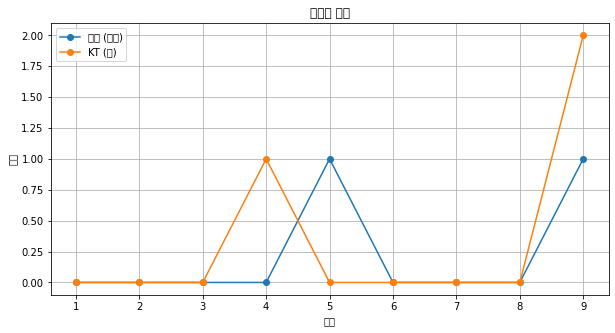

In [62]:
plt.figure(figsize=(10, 5))
plot_inning_scores("두산 (원정)", result['away_inning_scores'])
plot_inning_scores("KT (홈)", result['home_inning_scores'])
plt.show()

## 타자별 하루 결과를 나타내는 함수

In [63]:
def print_player_stats(team_name, stats_dict):
    print(f"\n📊 {team_name} 타자 성적")
    print("-" * 30)
    for player, stats in stats_dict.items():
        ab = stats['타수']
        hits = stats['안타']
        avg = hits / ab if ab > 0 else 0
        print(f"{player}: {ab}타수 {hits}안타 ({avg:.3f})")


In [64]:
print_player_stats("두산", result['away_stats'])
print_player_stats("KT", result['home_stats'])


📊 두산 타자 성적
------------------------------
정수빈: 4타수 0안타 (0.000)
김기연: 4타수 0안타 (0.000)
김인태: 4타수 1안타 (0.250)
케이브: 4타수 0안타 (0.000)
양의지: 3타수 1안타 (0.333)
양석환: 3타수 0안타 (0.000)
임종성: 3타수 0안타 (0.000)
오명진: 3타수 1안타 (0.333)
김재환: 3타수 1안타 (0.333)

📊 KT 타자 성적
------------------------------
로하스: 4타수 1안타 (0.250)
안현민: 4타수 1안타 (0.250)
김민혁: 4타수 0안타 (0.000)
황재균: 3타수 0안타 (0.000)
권동진: 3타수 0안타 (0.000)
김상수: 3타수 0안타 (0.000)
허경민: 3타수 0안타 (0.000)
강백호: 3타수 0안타 (0.000)
장성우: 3타수 1안타 (0.333)
